# Chapter 13: Convolutional Neural Networks

Convolutional neural networks (CNNs) are a class of artificial neural networks that came about from studying the visual cortex. They have shown to be incredibly effective neural network architectures for image classifications and _natural language processing_ (NLP).

## The Architecture of the Visual Cortex

David H. Hubel and Torsten Wiesel performed experiments on cats<sup>[[1]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1357023/pdf/jphysiol01301-0020.pdf)[[2]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1363130/pdf/jphysiol01298-0128.pdf)</sup> which showed that many neurons in the visual cortex only react to other neurons in a small _local receptive field_ of neurons. Some neurons only react to simple patterns whereas some neurons have larger receptive fields which may overlap with others and react to more complex patterns. This allows the brain to recognize complex visual patterns.

In 1998, Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner published a [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) introduced _LeNet-5_ architecture which is used to recognize handwritten digits. CNNs use fully connected hidden layers and the sigmoid activation function, but it also uses new components called _convolutional layers_ and _pooling layers_.

## Convolutional Layer

The fundamental building block of the CNN is called the _convolutional layer_. The convolutional layer is group of 2D layers of neurons where each neuron is only connected to neurons in the previous convolutional layer in its local receptive field, i.e. a neuron at row $i$ and column $j$ in a CNN is connected to $i + f_h - 1$ rows and $j + f_w - 1$ columns of the previous layer where $f_h$ and $f_w$ are the height and width of the local receptive field respectively.

To prevent the higher layer from being smaller than the lower layer, extra neurons whose weights are zero are added to the higher layer along the edges. This is called _zero padding_.

It is possible to connect a larger input layer to a smaller layer by spacing out the receptive fields. The distance between two consecutive receptive fields is called the stride. A neuron at row $i$ and column $j$ would be connected to neurons in rows $i \times s_h$ to $i \times s_h + f_h - 1$ and columns $j \times s_w$ to $j\times s_w + f_w - 1$.

### Filters

A neuron's weights can be represented as a small image the size of the local receptive field called a _filter_. A layer of neurons using the same filter is called a _feature map_.

### Stacking Feature Maps

A convolutional layer is a stack of individual feature maps. Each neuron in the convolutional layer receives inputs in its local receptive field from every feature map in the previous convolutional layer. The output of the neuron located in row $i$, column $j$ in feature map $k$ of convolutional layer $l$, we have

$$ z_{i,\,j,\,k} = b_k + \sum\limits_{u\,=\,0}^{f_h-1} \; \sum\limits_{v\,=\,0}^{f_w-1} \; \sum\limits_{k'\,=\,0}^{f_{n'}-1} x_{i',\,j',\,k'} \cdot w_{u,\,v,\,k',k} \;\; \text{with} \;\; \left\{ \begin{matrix} i' = i\times s_h + u \\ j' = j\times s_w + v \end{matrix} \right. $$

- $z_{i,\,j,\,k}$ is the output of the neuron located in row $i$, column $j$ of feature map $k$ in convolutional layer $l$.

- $s_h$ and $s_w$ are the vertical and horizontal strides, $f_h$ and $f_w$ is the height and width of the receptive field, and $f_{n'}$ is the number of feature maps in convolutional layer $l-1$.

- $x_{i',\,j',\,k'}$ is the output of the neuron located in layer $l-1$, row $i'$, column $j'$, and feature map $k'$ (or channel $k'$ if the previous layer is the input layer).

- $b_k$ is the bias term for feature map $k$ in layer $l$. It can be thought of as the "brightness" of the feature map.

- $w_{u,\,v,\,k',k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron's receptive field) and feature map $k'$, i.e. the feature map's _filter_.

### TensorFlow Implementation

In TensorFlow, each image is represented with a 3D tensor of shape `[height, width, channels]`. A mini-batch is a 4D tensor of shape `[mini-batch size, height, width, channels]`. The weights of a convolutional layer are another 4D tensor of shape $[f_h,f_w,f_{n'},f_n]$ and the bias term is a 1D tensor of shape $[f_n]$. Below is an example of loading two sample images and creates two $7\times7$ filters which it applies using TensorFlow's `tf.nn.conv2d()` function.

In [0]:
# Downloading the sample images.

from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

In [0]:
# Plotting the sample images.

import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

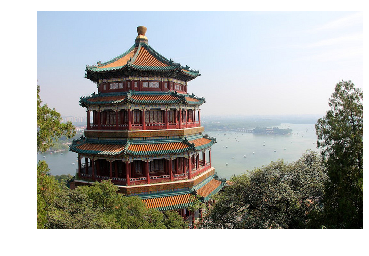

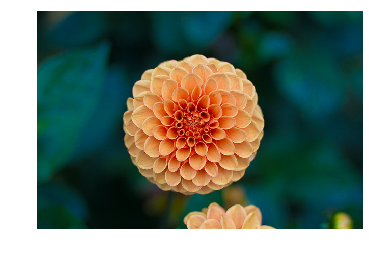

In [3]:
plot_image(china)
plt.show()
plot_image(flower)
plt.show()

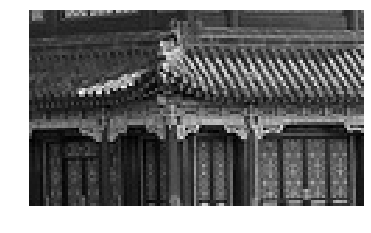

In [4]:
# Plotting a section of the China image.

import numpy as np

image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
plot_image(image_grayscale)

In [0]:
# Reshaping the image into a 4D tensor for tf.nn.

images = image_grayscale.reshape(1, height, width, 1)

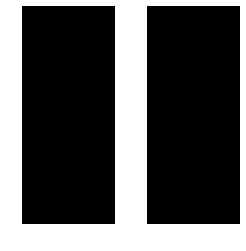

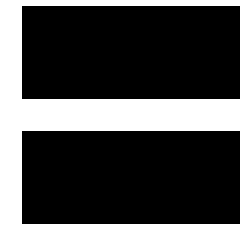

In [6]:
# Defining the filters for each feature map in the convolutional layer.

fmap = np.zeros((7, 7, 1, 2), dtype=np.float32)
fmap[:,3,0,0] = 1.0
fmap[3,:,0,1] = 1.0

plot_image(fmap[:,:,0,0])
plt.show()
plot_image(fmap[:,:,0,1])
plt.show()

In [0]:
# Creating a convolutional layer with TensorFlow.

import tensorflow as tf

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding='SAME')

In [0]:
# Applying the convolutional layer to the image.

with tf.Session() as sess:
  output = convolution.eval(feed_dict={X: images})

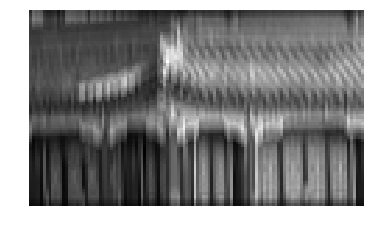

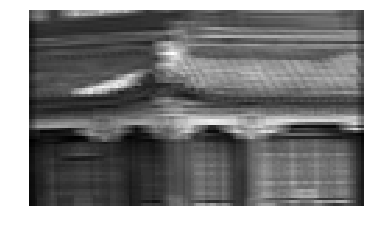

In [9]:
# Plotting the output of the convolutional layer.

plot_image(output[0,:,:,0])
plt.show()
plot_image(output[0,:,:,1])
plt.show()

In [0]:
# Below is an example of using convolutional layers using the entire sample
# images as inputs

tf.reset_default_graph()

dataset = np.array([china, flower], dtype=np.float32)
width, height, channels = china.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:,3,:,0] = 1.0  # vertical line
filters[3,:,:,1] = 1.0 # horizontal line

X = tf.placeholder(tf.float32, shape=(None, width, height, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
  output = convolution.eval(feed_dict={X: dataset})

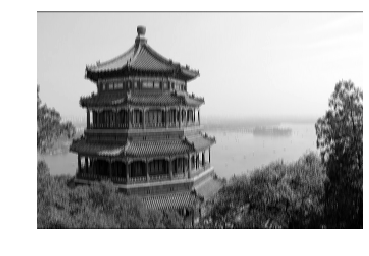

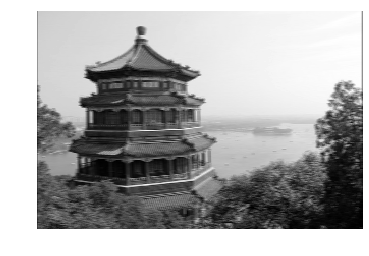

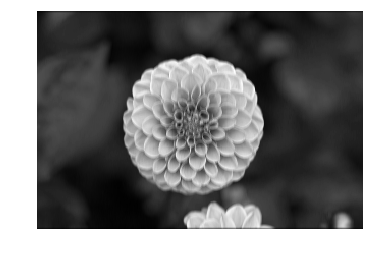

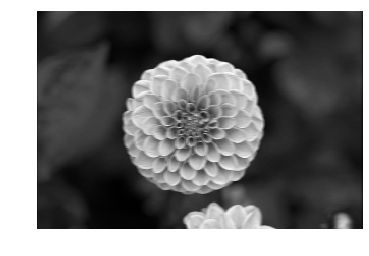

In [11]:
plot_image(output[0,:,:,0])
plt.show()
plot_image(output[0,:,:,1])
plt.show()
plot_image(output[1,:,:,0])
plt.show()
plot_image(output[1,:,:,1])
plt.show()

### VALID vs SAME padding

The `padding` hyperparameter can be one of two values: `"VALID"` or `"SAME"`.

- If `padding` is set to `"VALID"` then the layer will not do zero padding, and ignore the outermost neurons of the input layer.

- If `padding` is set to `"SAME"` then the model uses zero padding. It tries its best to keep the outputs in the center of the 2D grid of neurons.

In [12]:
# A convolutional layer using the tf.layers.conv2d

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, width, height, channels))
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2, 2],
                        padding='SAME')
init = tf.global_variables_initializer()

with tf.Session() as sess:
  init.run()
  output = conv.eval(feed_dict={X: dataset})

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.


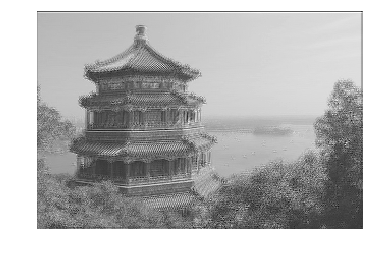

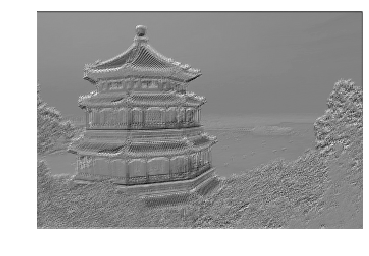

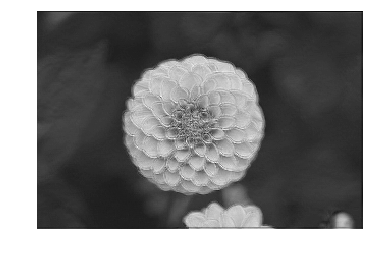

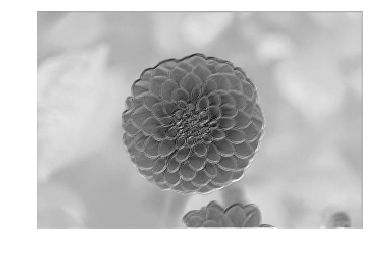

In [13]:
plot_image(output[0,:,:,0])
plt.show()
plot_image(output[0,:,:,1])
plt.show()
plot_image(output[1,:,:,0])
plt.show()
plot_image(output[1,:,:,1])
plt.show()

### Memory Requirements

One problem with CNNs is that they take up a lot of memory. For example a convolutional layer that applies a 5 $\times$ 5 filter outputting 200 feature maps of size 150 $\times$ 100 which stores its filter weights as 32-bit floats would require 11.4 MB of RAM _per training instance_. This is the space requirement alone. Training 100 instances over 1 GB of RAM.

## Pooling Layer

Pooling layers are relatively simple compared to convolutional layers. A pooling layer applies the values of neurons from a convolutional layer and aggregates them using either by computing the maximum or the mean. Like neurons in convolutional layers, neurons in pooling layers have local receptive fields.

TensorFlow implements both a max and mean pooling layer using `tf.nn.max_pool()` or `tf.nn.avg_pool()`. The local receptive field is given by the `ksize` parameter, a 4D tensor along the four dimensions of the input. `ksize[0]` must always be 1 since TensorFlow does not support cross instsnce pooling. It also does not support doing _both_ cross-channel pooling and pooling across multiple neurons in its input layer.

Below is an example of using TensorFlow's pooling layer:

In [0]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, width, height, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],
                          padding='VALID')

with tf.Session() as sess:
  output = max_pool.eval(feed_dict={X: dataset})

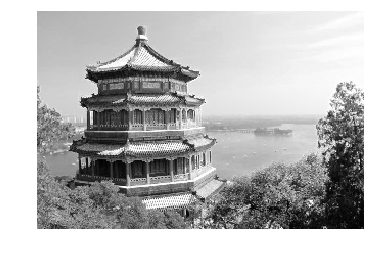

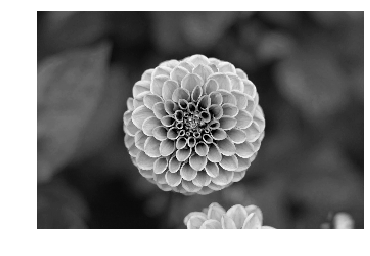

In [27]:
plot_image(output[0,:,:,0])
plt.show()
plot_image(output[1,:,:,1])
plt.show()

## CNN Architectures

A convolutional neural network's architecture is generally composed of:

1. A series of convolutional layers each layer applies a ReLU activation function.
2. A series of pooling layers to reduce the size of the output.
3. Another series of convolutional layers also using ReLU.
4. A series of pooling layers to further reduce the size of the output.
5. A fully connected DNN using the ReLU activation function.
6. A softmax layer which computes the model's class probabilities.

Variants of this basic architecture have also been developed which perform very well. Some of the notable architectures are the previous winners of the [ILSVRC ImageNet challenge](http://image-net.org). Below are some examples of previous winners of the competition.

### LeNet-5

The most widely known CNN architecture is LeNet-5 developed by Yann LeCun in 1998. It is composed of the following layers:

<table>
<thead>
<td> Label </td> <td> Type </td> <td> Maps </td> <td> Size </td>
<td> Kernel Size </td> <td> Stride </td> <td> Activation </td>
</thead>
<tr>
<td> Out </td> <td> Fully Connected </td> <td> - </td> <td> 10 </td>
<td> - </td> <td> - </td> <td> RBF </td>
</tr>
<tr>
<td> F6 </td> <td> Fully Connected </td> <td> - </td> <td> 84 </td>
<td> - </td> <td> - </td> <td> tanh </td>
</tr>
<tr>
<td> C5 </td> <td> Convolution </td> <td> 120 </td> <td> 1 $\times$ 1 </td>
<td> 5 $\times$ 5 </td> <td> 1 </td> <td> tanh </td>
</tr>
<tr>
<td> S4 </td> <td> Avg Pooling </td> <td> 16 </td> <td> 5 $\times$ 5 </td>
<td> 2 $\times$ 2 </td> <td> 2 </td> <td> tanh </td>
</tr>
<tr>
<td> C3 </td> <td> Convolution </td> <td> 16 </td> <td> 10 $\times$ 10 </td>
<td> 5 $\times$ 5 </td> <td> 1 </td> <td> tanh </td>
</tr>
<tr>
<td> S2 </td> <td> Avg Pooling </td> <td> 6 </td> <td> 14 $\times$ 14 </td>
<td> 2 $\times$ 2 </td> <td> 2 </td> <td> tanh </td>
</tr>
<tr>
<td> C1 </td> <td> Convolution </td> <td> 6 </td> <td> 28 $\times$ 28 </td>
<td> 5 $\times$ 5 </td> <td> 1 </td> <td> tanh </td>
</tr>
<tr>
<td> In </td> <td> Input </td> <td> 1 </td> <td> 32 $\times$ 32 </td>
<td> - </td> <td> - </td> <td> - </td>
</tr>
</table>

There are also additional details of the model:

- MNIST images are 28 $\times$ 28 pixels but they are zero-padded to 32 $\times$ 32 pixels and normalized. No other layer does not use padding.

- The average poooling layers multiply the result by a learnable scalar and bias term.

- Most neurons in C3 maps are connected to neurons in only 3 out of 4 S2 maps. More details are in the original paper.

- The output layer computes the square of the Euclidean distance between the input vector and the weight vector. Each output neuron measures how much the image belongs to that particular digit class. The cross entropy cost function is used as well.

You can read more on Yann LeCun's [website](http://yann.lecun.com/).